# Company Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,classification_report
%matplotlib inline
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import plotly.graph_objects as go


# Import dataset

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Decision Tree\\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


There are no missing or null values in the dataset

In [4]:
df.shape

(400, 11)

In [5]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
col_names = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


for col in col_names:
    
    print(df[col].value_counts())  

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64
121    16
122    14
131    14
123    13
115    12
       ..
94      1
161     1
97      1
88      1
85      1
Name: CompPrice, Length: 73, dtype: int64
69     11
42     10
32      8
100     8
67      7
       ..
27      1
114     1
43      1
112     1
23      1
Name: Income, Length: 98, dtype: int64
0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
8      11
14     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
23      2
22      2
24      1
25      1
26      1
29      1
21      1
Name: Advertising, dtype: int64
276    4
148    4
237    4
170    4
220    4
      ..
216    1
492    1
356    1
416    1
368    1
Name: Population, Length: 275, dtype: int64
120    12
128    12
107    10
104    10
131    10
       ..
49      1
155     1
24      1
148  

In [9]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# Correlation Matrix

In [10]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

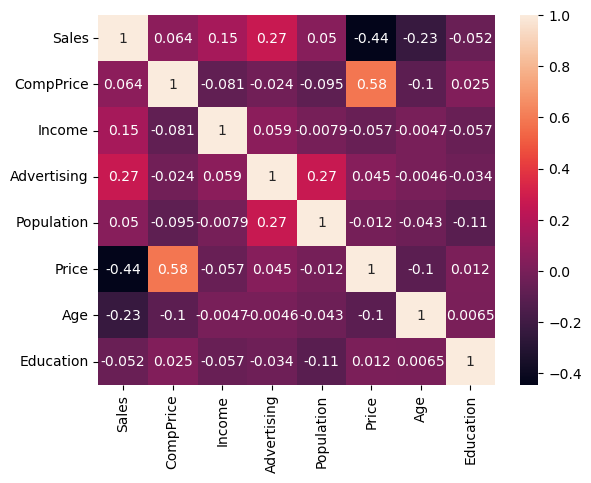

In [11]:
sns.heatmap(df.corr(),annot = True)

# Encoding the categorical data

In [12]:
df['ShelveLoc'] = df ['ShelveLoc'].map({'Bad':3,'Medium':2,'Good':1})

In [13]:
df['Urban'] = df['Urban'].map({'No':0,'Yes':1})

In [14]:
df['US'] = df['US'].map({'No':0,'Yes':1})

In [15]:
df.sort_values(by='Sales')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,0.00,139,24,0,358,185,2,79,15,0,0
106,0.16,102,33,0,217,139,2,70,18,0,0
165,0.37,147,58,7,100,191,3,27,15,1,1
143,0.53,122,88,7,36,159,3,28,17,1,1
57,0.91,93,91,0,22,117,3,75,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18,13.91,110,110,0,408,68,1,46,17,0,1
367,14.37,95,106,0,256,53,1,52,17,1,0
25,14.90,139,32,0,176,82,1,54,11,0,0
316,15.63,122,36,5,369,72,1,35,10,1,1


In [16]:
q0 = 0-0.005
q2 = df['Sales'].quantile(0.5)
q4 = df['Sales'].quantile(1)

In [17]:
df['Sales_Cat'] = pd.cut(df.Sales,bins = [q0,q2,q4],labels = ['Low Sales','High Sales'])

In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,3,42,17,1,1,High Sales
1,11.22,111,48,16,260,83,1,65,10,1,1,High Sales
2,10.06,113,35,10,269,80,2,59,12,1,1,High Sales
3,7.40,117,100,4,466,97,2,55,14,1,1,Low Sales
4,4.15,141,64,3,340,128,3,38,13,1,0,Low Sales


In [19]:
df['Sales_Cat'].value_counts()

Low Sales     201
High Sales    199
Name: Sales_Cat, dtype: int64

In [20]:
df['Sales_Cat'] = df['Sales_Cat'].map({'High Sales':1,'Low Sales':0})

In [21]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,3,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,3,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,3,50,12,1,1,0


In [22]:
df['Sales_Cat'].value_counts()

0    201
1    199
Name: Sales_Cat, dtype: int64

# Countplot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


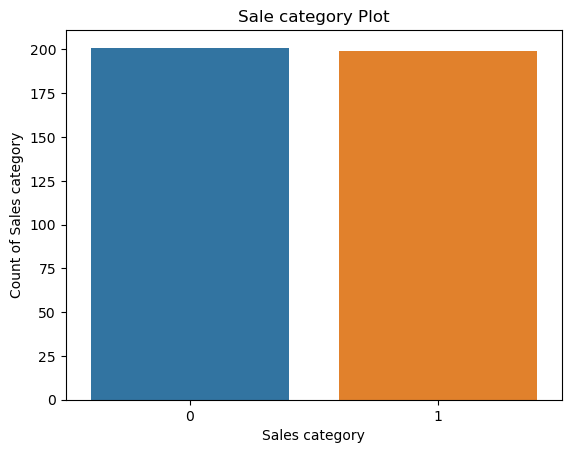

In [23]:
sns.countplot(df['Sales_Cat'])
plt.xlabel('Sales category')
plt.ylabel('Count of Sales category')
plt.title('Sale category Plot')
plt.show()

# Scaling the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(df),
                  columns = df.columns,
                  index = df.index)

In [25]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0,0.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0,1.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0,0.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0,0.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0,0.0


In [26]:
df1 = df1.drop(['Sales'],axis =1)

# Pairplot

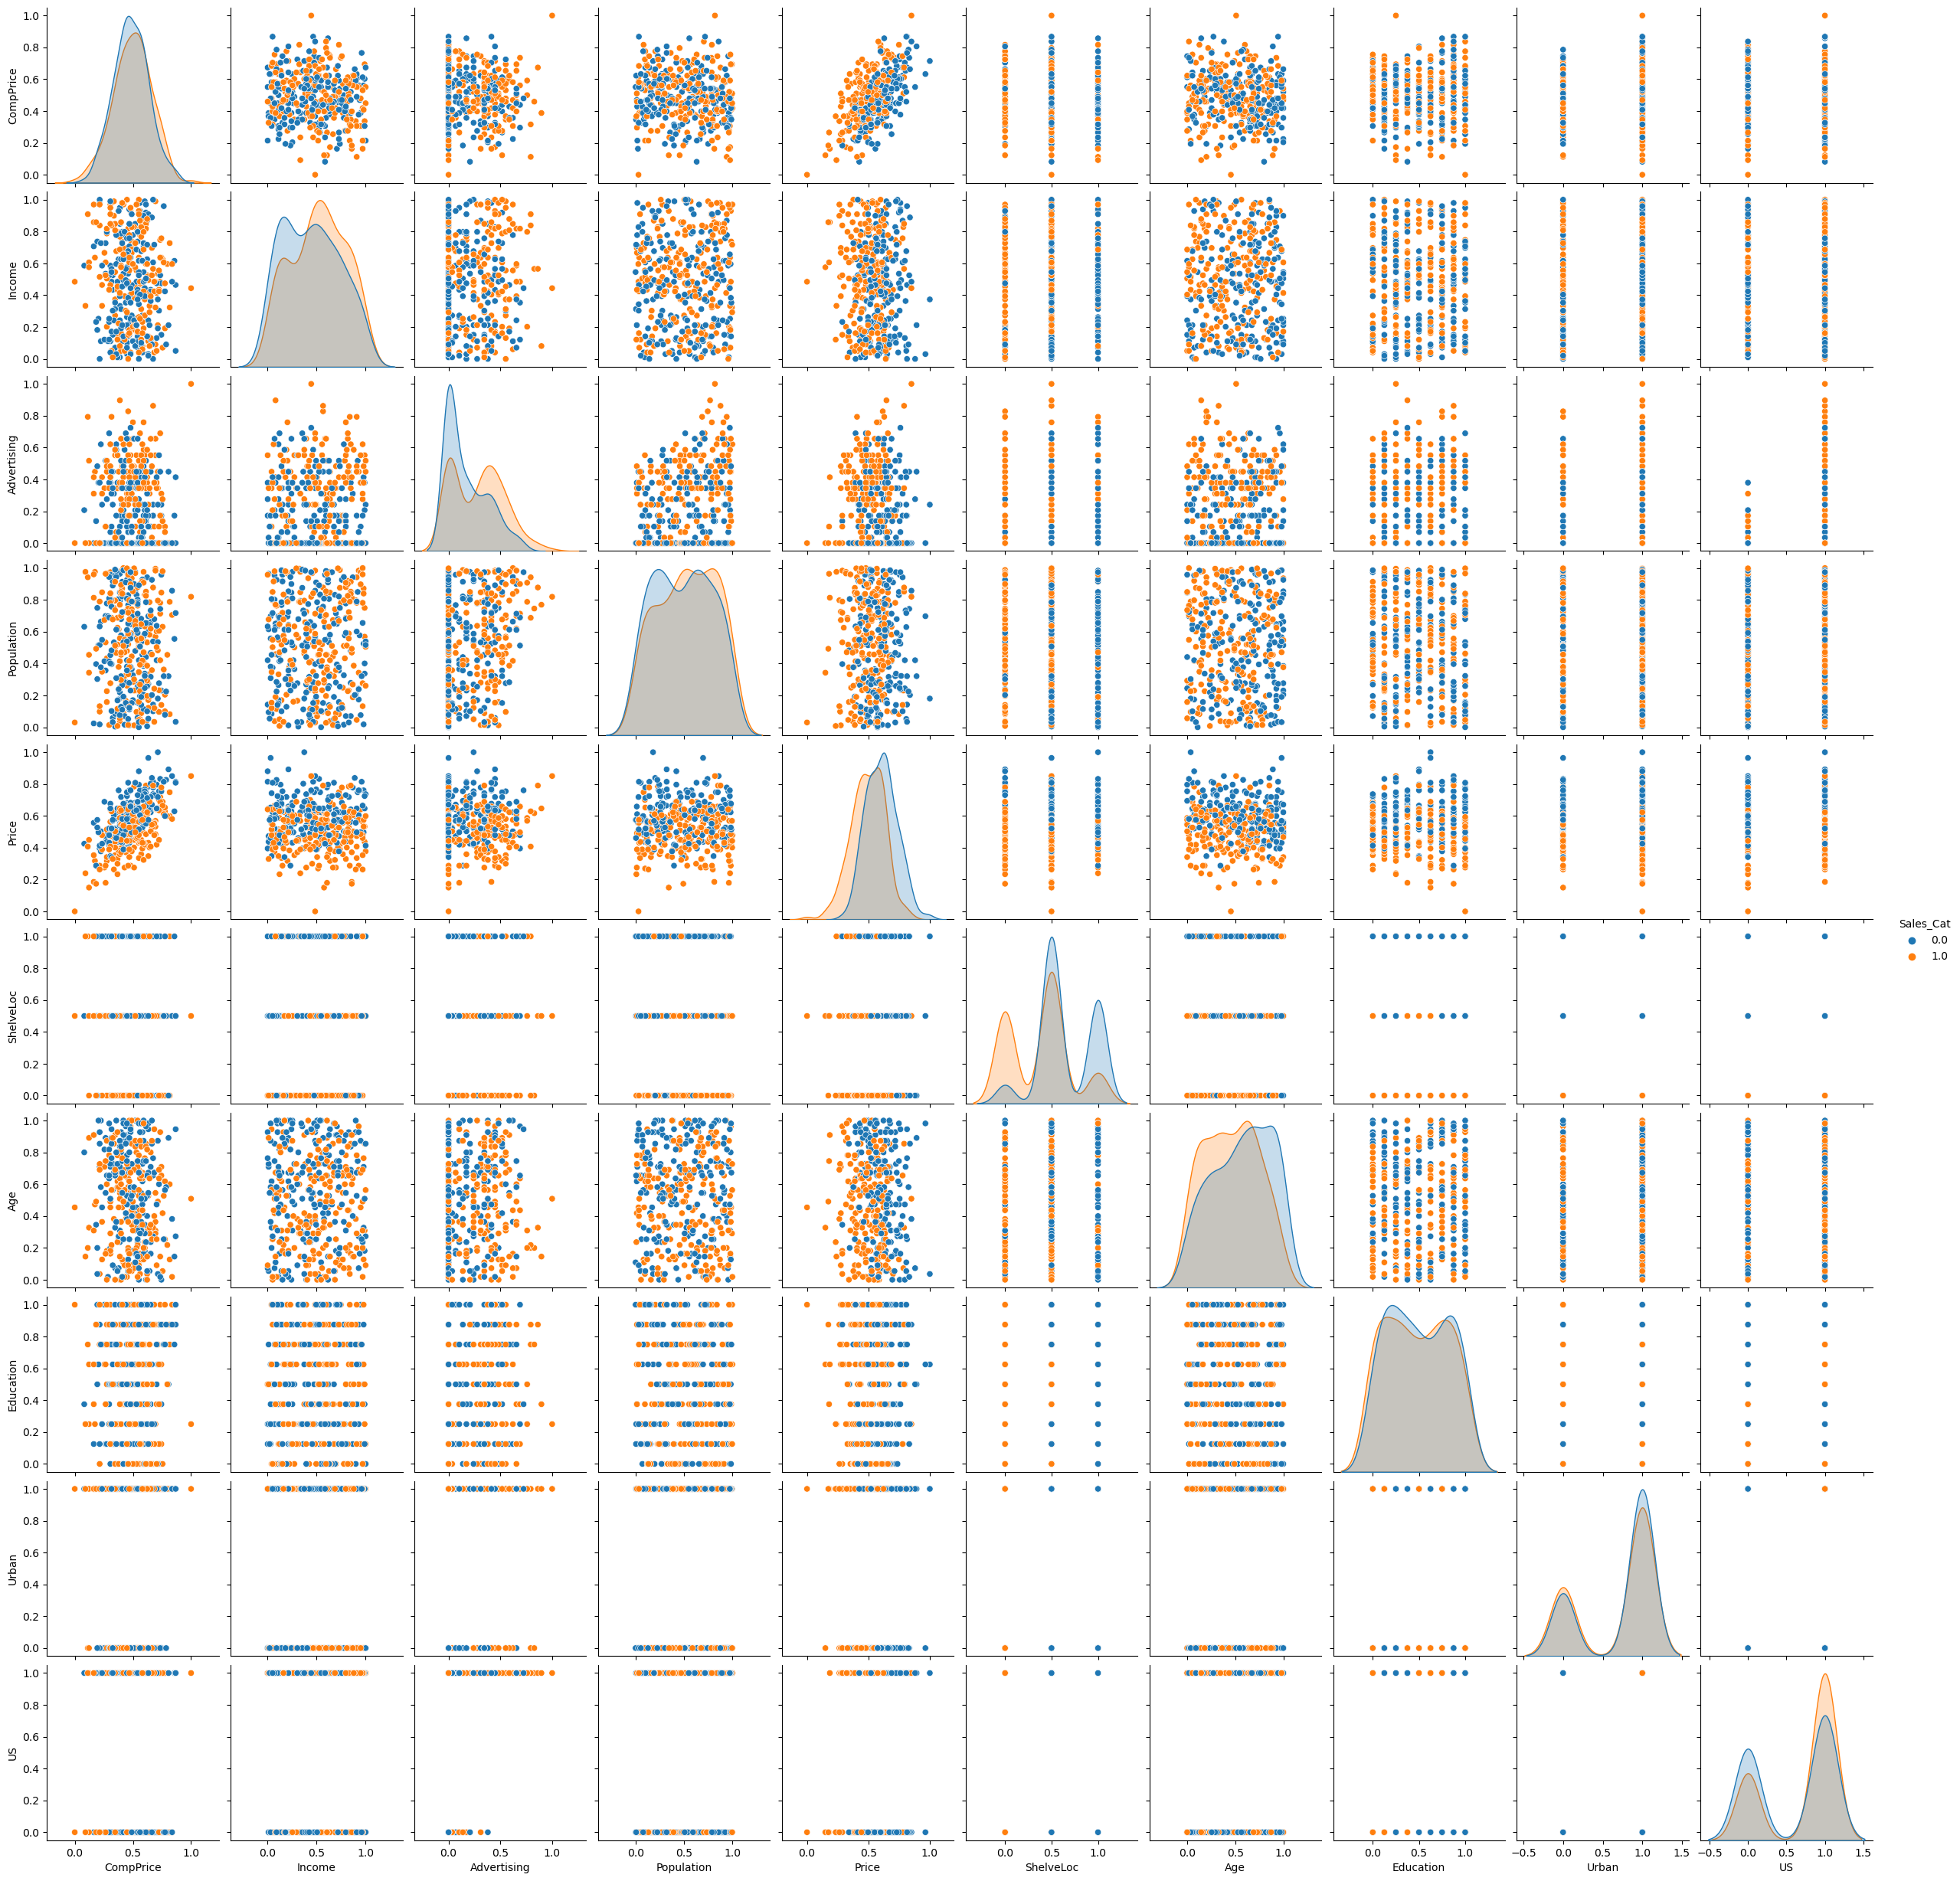

In [27]:
sns.pairplot(df1, hue = 'Sales_Cat')

# Spliting the data into feature and target variable

In [28]:
X = df1.drop(['Sales_Cat'],axis =1)
Y = df1.iloc[:,-1]

In [29]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0


In [30]:
Y.head()

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Sales_Cat, dtype: float64

# Splitting data into separate training and test set

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.33, random_state =42)

In [32]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,0.316327,0.171717,0.000000,0.482966,0.341317,1.0,0.854545,0.500,0.0,0.0
177,0.622449,0.515152,0.000000,0.276553,0.419162,0.5,0.036364,0.875,1.0,1.0
119,0.540816,0.737374,0.275862,0.254509,0.622754,0.5,0.709091,0.250,1.0,1.0
194,0.357143,0.777778,0.620690,0.943888,0.622754,0.5,0.363636,0.125,1.0,1.0
229,0.214286,0.838384,0.000000,0.789579,0.287425,0.5,0.036364,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
71,0.724490,0.303030,0.551724,0.276553,0.754491,0.5,0.600000,0.875,0.0,1.0
106,0.255102,0.121212,0.000000,0.414830,0.688623,0.5,0.818182,1.000,0.0,0.0
270,0.428571,0.050505,0.000000,0.549098,0.389222,0.0,0.018182,0.000,1.0,0.0
348,0.561224,0.818182,0.689655,0.899800,0.497006,0.0,0.436364,0.125,1.0,1.0


In [33]:
y_train

258    0.0
177    1.0
119    0.0
194    0.0
229    1.0
      ... 
71     0.0
106    0.0
270    1.0
348    1.0
102    0.0
Name: Sales_Cat, Length: 268, dtype: float64

In [34]:
X_train.shape

(268, 10)

In [35]:
y_train.shape

(268,)

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(criterion='gini',
                            max_depth=7,
                            min_samples_split=10,
                            random_state=42)

In [37]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=10, random_state=42)

In [38]:
clf.feature_importances_

array([0.10220199, 0.06885617, 0.07480869, 0.08885785, 0.31633642,
       0.16294782, 0.13758965, 0.03553501, 0.00769647, 0.00516992])

In [39]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [40]:
y_pred = clf.predict(X_test)

In [41]:
y_pred

array([1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.])

In [42]:
pd.DataFrame({'Actual':y_test,
             'Predicted':y_pred})

,Actual,Predicted
209,0.0,1.0
280,0.0,0.0
33,1.0,1.0
210,0.0,0.0
93,1.0,1.0
...,...,...
332,0.0,1.0
167,0.0,1.0
245,1.0,1.0
311,0.0,0.0


# Confusion Matrix

In [43]:
confusion_matrix(y_test,y_pred)

array([[44, 15],
       [14, 59]], dtype=int64)

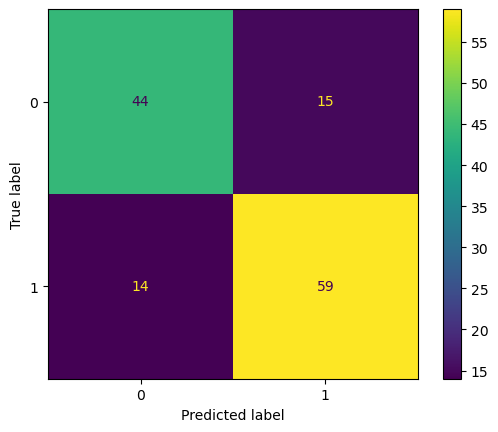

In [44]:
confusionmatrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix)
cm_display.plot()
plt.show() 

# Classification Report

In [45]:
cn = ['Low Sales','High Sales'] 
print(classification_report(y_test, y_pred, target_names=cn))

              precision    recall  f1-score   support

   Low Sales       0.76      0.75      0.75        59
  High Sales       0.80      0.81      0.80        73

    accuracy                           0.78       132
   macro avg       0.78      0.78      0.78       132
weighted avg       0.78      0.78      0.78       132



# Accuracy Score

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7803030303030303

# Cross validation score

In [47]:
seed = 7
kfold = KFold(n_splits=10)

In [48]:
model = DecisionTreeClassifier()

In [49]:
results = cross_val_score(model, X, Y, cv = kfold)
results

array([0.725, 0.75 , 0.525, 0.775, 0.8  , 0.85 , 0.65 , 0.725, 0.575,
       0.775])

In [50]:
results.mean()

0.7150000000000001

# Feature Importance Plot

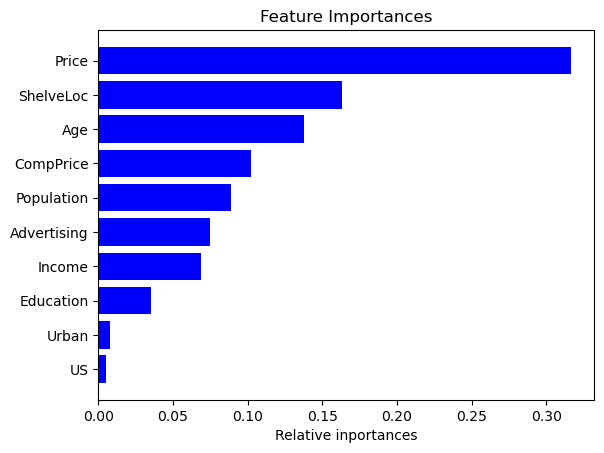

In [51]:
features = df1.columns
importances = clf.feature_importances_
indicies = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color = 'b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative inportances')
plt.show()